In [1]:
# ================================================================================
# ASSIGNMENT - 1 Submitted by: LASIT VYAS
# ================================================================================

# MSIT 3103 — Environment setup

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time

print(f"Using Python {sys.version.split()[0]}")

Using Python 3.12.11


In [3]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


Training on 20000 samples

1. NON-LINEAR CLASSIFIER COMPARISON


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.9179 (Time: 16.4s)
SVM: 0.9695 (Time: 26.8s)
Decision Tree: 0.8423 (Time: 4.6s)

2. REGULARIZATION EXPERIMENTS


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

  penalty      C  accuracy
0      L2   0.01    0.9106
1      L2   0.10    0.9183
2      L2   1.00    0.9163
3      L2  10.00    0.9063
4      L1   0.01    0.8533
5      L1   0.10    0.9108
6      L1   1.00    0.9179
7      L1  10.00    0.9140

3. FEATURE IMPORTANCE VISUALIZATION


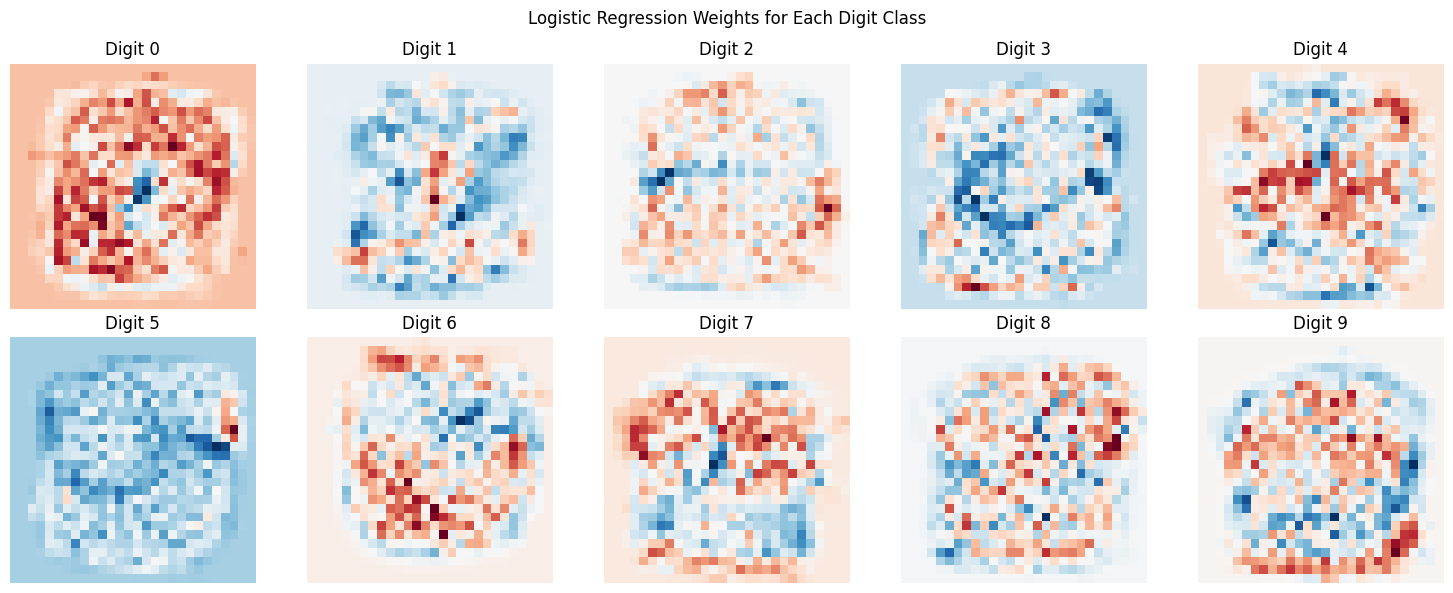


4. CROSS-VALIDATION
Logistic Regression: 0.9097 ± 0.0030
Decision Tree: 0.8261 ± 0.0039

PART 1 SUMMARY


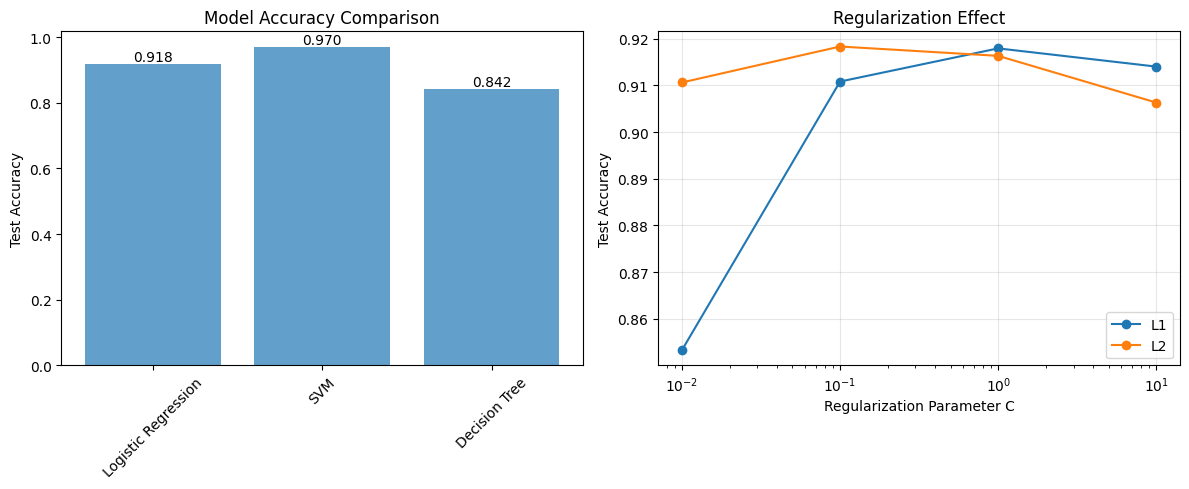

Part 1 completed. Results stored for integration with Parts 3 & 4.


In [4]:
# ================================================================================
# PART 1: DISCRIMINATIVE MODELS
# ================================================================================

# ================================================================================
# 1. LOAD DATA
# ================================================================================

# Load MNIST data
train_df = pd.read_csv("/content/mnist_train.csv")
test_df = pd.read_csv("/content/mnist_test.csv")

# Prepare data
label_col = train_df.columns[0]
y_train = train_df[label_col].values
X_train = train_df.drop(columns=[label_col]).values
y_test = test_df[label_col].values
X_test = test_df.drop(columns=[label_col]).values

# Normalize
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Use subset for efficiency
subset = 20000
X_train_small = X_train[:subset]
y_train_small = y_train[:subset]

print(f"Training on {subset} samples")

# ================================================================================
# 2. REQUIREMENT 1: NON-LINEAR CLASSIFIER COMPARISON
# ================================================================================

print("\n1. NON-LINEAR CLASSIFIER COMPARISON")
print("=" * 50)

# Store results
results = {}
times = {}

# Logistic Regression (baseline)
start = time.time()
lr = LogisticRegression(max_iter=100, random_state=42)
lr.fit(X_train_small, y_train_small)
lr_time = time.time() - start
lr_acc = accuracy_score(y_test, lr.predict(X_test))
results['Logistic Regression'] = lr_acc
times['Logistic Regression'] = lr_time

# SVM
start = time.time()
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train_small, y_train_small)
svm_time = time.time() - start
svm_acc = accuracy_score(y_test, svm.predict(X_test))
results['SVM'] = svm_acc
times['SVM'] = svm_time

# Decision Tree
start = time.time()
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train_small, y_train_small)
dt_time = time.time() - start
dt_acc = accuracy_score(y_test, dt.predict(X_test))
results['Decision Tree'] = dt_acc
times['Decision Tree'] = dt_time

# Print results
for model, acc in results.items():
    print(f"{model}: {acc:.4f} (Time: {times[model]:.1f}s)")

# ================================================================================
# 3. REQUIREMENT 2: REGULARIZATION EXPERIMENTS
# ================================================================================

print("\n2. REGULARIZATION EXPERIMENTS")
print("=" * 50)

C_values = [0.01, 0.1, 1.0, 10.0]
reg_results = []

# L2 Regularization
for C in C_values:
    lr_l2 = LogisticRegression(penalty='l2', C=C, max_iter=200, random_state=42)
    lr_l2.fit(X_train_small, y_train_small)
    acc = accuracy_score(y_test, lr_l2.predict(X_test))
    reg_results.append({'penalty': 'L2', 'C': C, 'accuracy': acc})

# L1 Regularization
for C in C_values:
    lr_l1 = LogisticRegression(penalty='l1', C=C, solver='saga', max_iter=200, random_state=42)
    lr_l1.fit(X_train_small, y_train_small)
    acc = accuracy_score(y_test, lr_l1.predict(X_test))
    reg_results.append({'penalty': 'L1', 'C': C, 'accuracy': acc})

# Print regularization results
reg_df = pd.DataFrame(reg_results)
print(reg_df)

# ================================================================================
# 4. REQUIREMENT 3: FEATURE IMPORTANCE VISUALIZATION
# ================================================================================

print("\n3. FEATURE IMPORTANCE VISUALIZATION")
print("=" * 50)

# Logistic Regression weights (8x8 heatmaps for each digit)
weights = lr.coef_  # Shape: (10, 784)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    weight_img = weights[i].reshape(28, 28)
    axes[i].imshow(weight_img, cmap='RdBu_r')
    axes[i].set_title(f'Digit {i}')
    axes[i].axis('off')

plt.suptitle('Logistic Regression Weights for Each Digit Class')
plt.tight_layout()
plt.show()

# ================================================================================
# 5. REQUIREMENT 4: CROSS-VALIDATION
# ================================================================================

print("\n4. CROSS-VALIDATION")
print("=" * 50)

# 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}

# Logistic Regression CV
lr_cv_scores = cross_val_score(LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
                               X_train_small, y_train_small, cv=cv, scoring='accuracy')
cv_results['Logistic Regression'] = lr_cv_scores

# Decision Tree CV
dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=20, random_state=42),
                               X_train_small, y_train_small, cv=cv, scoring='accuracy')
cv_results['Decision Tree'] = dt_cv_scores

# Print CV results
for model, scores in cv_results.items():
    mean_acc = np.mean(scores)
    std_acc = np.std(scores)
    print(f"{model}: {mean_acc:.4f} ± {std_acc:.4f}")

# ================================================================================
# 6. RESULTS SUMMARY
# ================================================================================

print("\nPART 1 SUMMARY")
print("=" * 50)

# Model comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
models = list(results.keys())
accuracies = list(results.values())
ax1.bar(models, accuracies, alpha=0.7)
ax1.set_ylabel('Test Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.tick_params(axis='x', rotation=45)
for i, acc in enumerate(accuracies):
    ax1.text(i, acc + 0.01, f'{acc:.3f}', ha='center')

# Regularization effect
for penalty in ['L1', 'L2']:
    subset = reg_df[reg_df['penalty'] == penalty]
    ax2.plot(subset['C'], subset['accuracy'], 'o-', label=penalty)
ax2.set_xlabel('Regularization Parameter C')
ax2.set_ylabel('Test Accuracy')
ax2.set_title('Regularization Effect')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Store results for Parts 3 & 4
part1_results = {
    'model_results': results,
    'training_times': times,
    'cv_results': cv_results,
    'regularization_results': reg_df
}

print("Part 1 completed. Results stored for integration with Parts 3 & 4.")

In [5]:
# This should already be there from the updated Part 1 code
print(f"Part 1 results keys: {list(part1_results.keys())}")

Part 1 results keys: ['model_results', 'training_times', 'cv_results', 'regularization_results']


Using device: cuda
5. HYPERPARAMETER SENSITIVITY ANALYSIS

Testing: Small_Batch


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.04MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.82MB/s]


[Small_Batch] Step 0: D_loss: 1.3108, G_loss: 0.7246
[Small_Batch] Step 100: D_loss: 1.1183, G_loss: 0.9932
[Small_Batch] Step 200: D_loss: 1.0641, G_loss: 1.0819
[Small_Batch] Step 300: D_loss: 0.4391, G_loss: 2.2039
[Small_Batch] Step 400: D_loss: 0.4361, G_loss: 2.4696
[Small_Batch] Step 500: D_loss: 0.4507, G_loss: 2.3957
[Small_Batch] Step 600: D_loss: 0.3256, G_loss: 3.1294
[Small_Batch] Step 700: D_loss: 0.1427, G_loss: 3.7001
[Small_Batch] Step 800: D_loss: 0.1923, G_loss: 3.5731
[Small_Batch] Step 900: D_loss: 0.2029, G_loss: 3.6936
[Small_Batch] Step 1000: D_loss: 0.3594, G_loss: 4.2684
[Small_Batch] Step 1100: D_loss: 0.3213, G_loss: 2.9245
[Small_Batch] Step 1200: D_loss: 0.4504, G_loss: 2.4499
[Small_Batch] Step 1300: D_loss: 0.2447, G_loss: 3.0907
[Small_Batch] Step 1400: D_loss: 0.1248, G_loss: 3.6658
[Small_Batch] Step 1500: D_loss: 0.1912, G_loss: 3.8766
[Small_Batch] Step 1600: D_loss: 0.3927, G_loss: 3.5508
[Small_Batch] Step 1700: D_loss: 0.4654, G_loss: 4.7935
[Sma

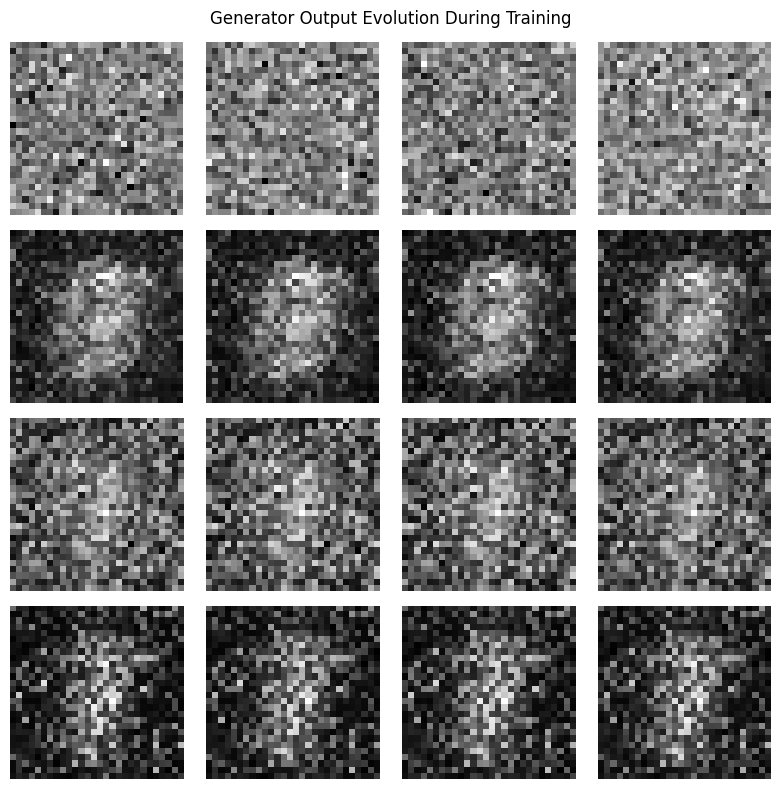


7. LOSS CURVES ANALYSIS


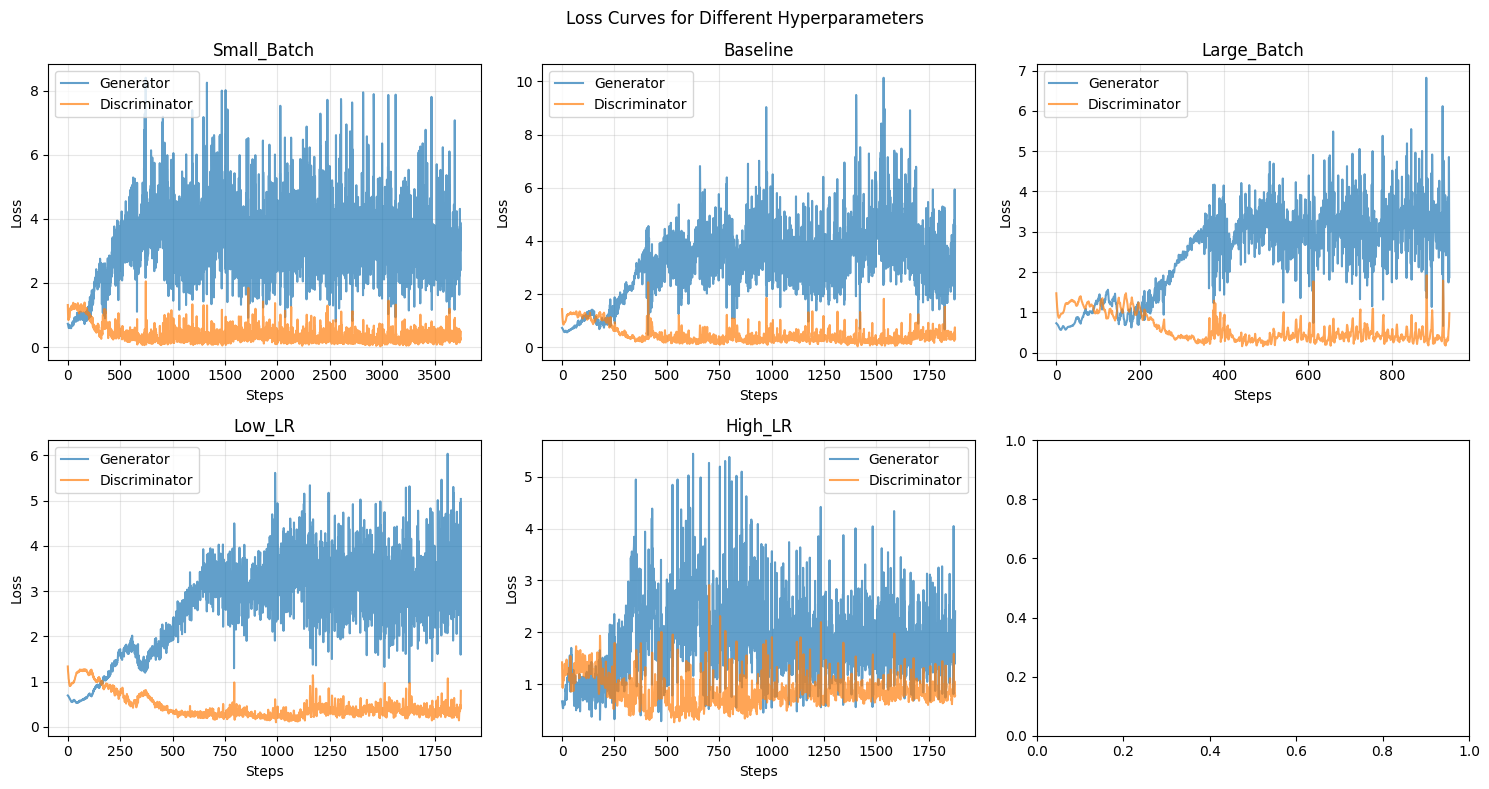


8. MODE COLLAPSE EXPERIMENT
Testing unstable hyperparameters to induce mode collapse...
[Mode_Collapse_Test] Step 0: D_loss: 1.3973, G_loss: 0.6754
[Mode_Collapse_Test] Step 100: D_loss: 0.1230, G_loss: 3.0008
[Mode_Collapse_Test] Step 200: D_loss: 0.0077, G_loss: 6.1813
[Mode_Collapse_Test] Step 300: D_loss: 0.0025, G_loss: 7.3386
[Mode_Collapse_Test] Step 400: D_loss: 0.0018, G_loss: 7.6738
[Mode_Collapse_Test] Step 500: D_loss: 0.0035, G_loss: 6.0872
[Mode_Collapse_Test] Step 600: D_loss: 0.0684, G_loss: 4.5676
[Mode_Collapse_Test] Step 700: D_loss: 0.0052, G_loss: 6.4095
[Mode_Collapse_Test] Step 800: D_loss: 0.0010, G_loss: 8.5504
[Mode_Collapse_Test] Step 900: D_loss: 0.0004, G_loss: 9.2414
[Mode_Collapse_Test] Step 1000: D_loss: 0.0003, G_loss: 9.8192
[Mode_Collapse_Test] Step 1100: D_loss: 0.0002, G_loss: 10.1605
[Mode_Collapse_Test] Step 1200: D_loss: 0.0002, G_loss: 10.2684
[Mode_Collapse_Test] Step 1300: D_loss: 0.0001, G_loss: 10.3460
[Mode_Collapse_Test] Step 1400: D_loss

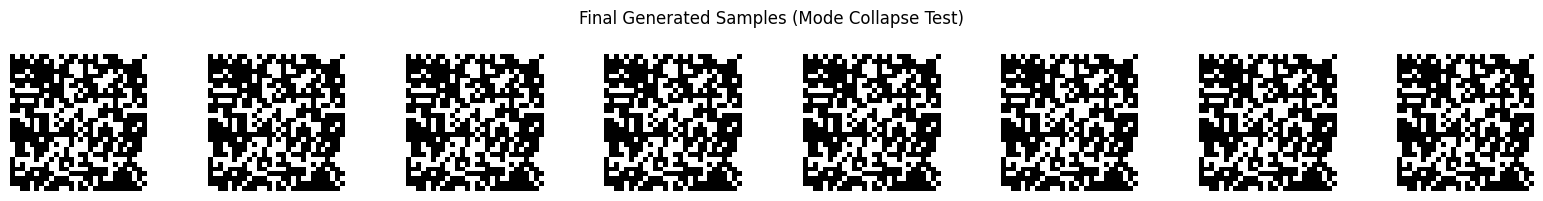


9. ARCHITECTURE MODIFICATIONS
Testing modified architecture with larger capacity...
[Modified_Architecture] Step 0: D_loss: 1.4313, G_loss: 0.6598
[Modified_Architecture] Step 100: D_loss: 1.3106, G_loss: 0.7702
[Modified_Architecture] Step 200: D_loss: 1.2246, G_loss: 0.8389
[Modified_Architecture] Step 300: D_loss: 1.0082, G_loss: 0.9629
[Modified_Architecture] Step 400: D_loss: 0.7968, G_loss: 1.5251
[Modified_Architecture] Step 500: D_loss: 0.8118, G_loss: 1.9320
[Modified_Architecture] Step 600: D_loss: 0.8952, G_loss: 1.6493
[Modified_Architecture] Step 700: D_loss: 0.8380, G_loss: 3.8743
[Modified_Architecture] Step 800: D_loss: 0.7626, G_loss: 2.5491
[Modified_Architecture] Step 900: D_loss: 0.4344, G_loss: 2.4331
[Modified_Architecture] Step 1000: D_loss: 0.6601, G_loss: 1.1776
[Modified_Architecture] Step 1100: D_loss: 0.7884, G_loss: 2.1245
[Modified_Architecture] Step 1200: D_loss: 0.3669, G_loss: 3.7169
[Modified_Architecture] Step 1300: D_loss: 0.3458, G_loss: 3.6395
[Mo

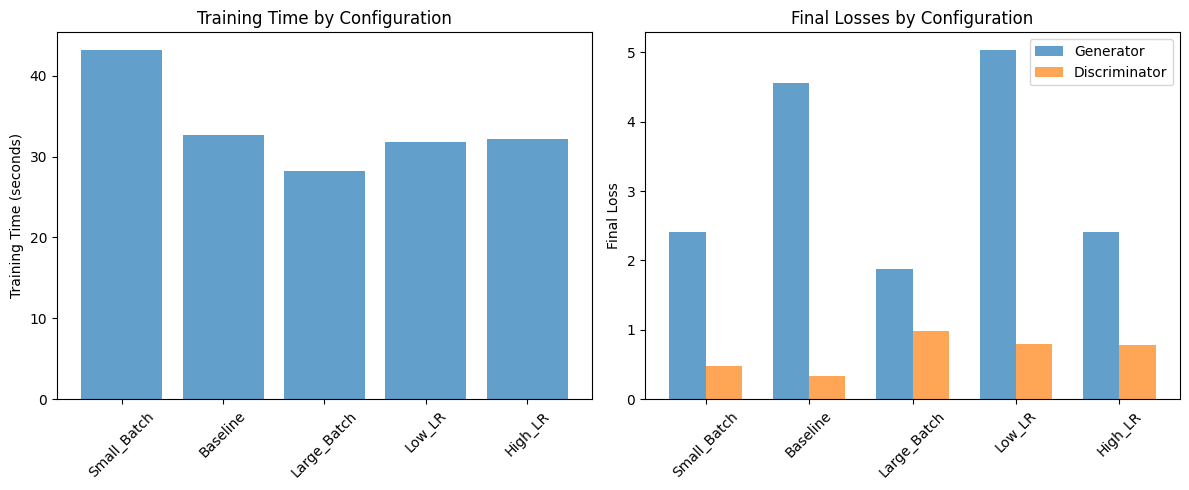

Part 2 completed. Results stored for integration with Parts 3 & 4.


In [6]:
# ================================================================================
# PART 2: GENERATIVE MODELS (GAN)
# ================================================================================

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ================================================================================
# GAN ARCHITECTURE
# ================================================================================

class Generator(nn.Module):
    def __init__(self, latent_dim=100, hidden_dim=256):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Linear(hidden_dim * 2, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, hidden_dim=256):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, hidden_dim * 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# ================================================================================
# TRAINING FUNCTION
# ================================================================================

def train_gan(generator, discriminator, dataloader, epochs, lr_g=0.0002, lr_d=0.0002,
              save_interval=200, experiment_name="GAN"):

    # Optimizers
    optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.999))

    # Loss function
    criterion = nn.BCELoss()

    # Training history
    g_losses = []
    d_losses = []
    generated_samples = {}

    # Fixed noise for consistent visualization
    fixed_noise = torch.randn(16, 100, device=device)

    step = 0
    start_time = time.time()

    for epoch in range(epochs):
        for i, (real_images, _) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.view(batch_size, -1).to(device)

            # Labels
            real_labels = torch.ones(batch_size, 1, device=device)
            fake_labels = torch.zeros(batch_size, 1, device=device)

            # Train Discriminator
            optimizer_D.zero_grad()

            # Real images
            d_real = discriminator(real_images)
            d_loss_real = criterion(d_real, real_labels)

            # Fake images
            z = torch.randn(batch_size, 100, device=device)
            fake_images = generator(z)
            d_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(d_fake, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()

            d_fake = discriminator(fake_images)
            g_loss = criterion(d_fake, real_labels)
            g_loss.backward()
            optimizer_G.step()

            # Store losses
            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

            # Save samples
            if step % save_interval == 0:
                with torch.no_grad():
                    samples = generator(fixed_noise).cpu()
                    generated_samples[step] = samples

            if step % 100 == 0:
                print(f'[{experiment_name}] Step {step}: D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}')

            step += 1

    training_time = time.time() - start_time

    return {
        'g_losses': g_losses,
        'd_losses': d_losses,
        'generated_samples': generated_samples,
        'training_time': training_time,
        'generator': generator,
        'discriminator': discriminator
    }

# ================================================================================
# DATA LOADING
# ================================================================================

def load_mnist_data(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

# ================================================================================
# REQUIREMENT 5: HYPERPARAMETER SENSITIVITY
# ================================================================================

print("5. HYPERPARAMETER SENSITIVITY ANALYSIS")
print("=" * 50)

# Different configurations
configs = [
    {'batch_size': 32, 'lr_g': 0.0002, 'lr_d': 0.0002, 'name': 'Small_Batch'},
    {'batch_size': 64, 'lr_g': 0.0002, 'lr_d': 0.0002, 'name': 'Baseline'},
    {'batch_size': 128, 'lr_g': 0.0002, 'lr_d': 0.0002, 'name': 'Large_Batch'},
    {'batch_size': 64, 'lr_g': 0.0001, 'lr_d': 0.0001, 'name': 'Low_LR'},
    {'batch_size': 64, 'lr_g': 0.0005, 'lr_d': 0.0005, 'name': 'High_LR'}
]

hyperparam_results = {}

for config in configs:
    print(f"\nTesting: {config['name']}")

    # Load data with specific batch size
    dataloader = load_mnist_data(batch_size=config['batch_size'])

    # Create models
    generator = Generator().to(device)
    discriminator = Discriminator().to(device)

    # Train
    result = train_gan(generator, discriminator, dataloader, epochs=2,
                      lr_g=config['lr_g'], lr_d=config['lr_d'],
                      experiment_name=config['name'])

    hyperparam_results[config['name']] = result

# ================================================================================
# REQUIREMENT 6: TRAINING PROGRESS VISUALIZATION
# ================================================================================

print("\n6. TRAINING PROGRESS VISUALIZATION")
print("=" * 50)

# Show training progress for baseline
baseline_result = hyperparam_results['Baseline']
samples = baseline_result['generated_samples']

# Plot samples at different training steps
steps = sorted(samples.keys())[:4]  # Show 4 time points
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, step in enumerate(steps):
    step_samples = samples[step][:4]  # Show 4 samples per step
    for j in range(4):
        img = step_samples[j].reshape(28, 28)
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(f'Step {step}', rotation=90)

plt.suptitle('Generator Output Evolution During Training')
plt.tight_layout()
plt.show()

# ================================================================================
# REQUIREMENT 7: LOSS CURVES
# ================================================================================

print("\n7. LOSS CURVES ANALYSIS")
print("=" * 50)

# Plot loss curves for different configurations
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (name, result) in enumerate(hyperparam_results.items()):
    if i < 6:
        steps = range(len(result['g_losses']))
        axes[i].plot(steps, result['g_losses'], label='Generator', alpha=0.7)
        axes[i].plot(steps, result['d_losses'], label='Discriminator', alpha=0.7)
        axes[i].set_title(f'{name}')
        axes[i].set_xlabel('Steps')
        axes[i].set_ylabel('Loss')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.suptitle('Loss Curves for Different Hyperparameters')
plt.tight_layout()
plt.show()

# ================================================================================
# REQUIREMENT 8: MODE COLLAPSE EXPERIMENT
# ================================================================================

print("\n8. MODE COLLAPSE EXPERIMENT")
print("=" * 50)

# Unstable configuration to induce mode collapse
print("Testing unstable hyperparameters to induce mode collapse...")

dataloader = load_mnist_data(batch_size=64)
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Use very high learning rates to cause instability
unstable_result = train_gan(generator, discriminator, dataloader, epochs=2,
                           lr_g=0.01, lr_d=0.0001,  # Generator much faster than discriminator
                           experiment_name="Mode_Collapse_Test")

# Analyze for mode collapse
g_losses = unstable_result['g_losses']
recent_variance = np.var(g_losses[-100:]) if len(g_losses) > 100 else np.var(g_losses)

print(f"Recent generator loss variance: {recent_variance:.6f}")
print("Low variance may indicate mode collapse")

# Show final generated samples
final_samples = list(unstable_result['generated_samples'].values())[-1][:8]
fig, axes = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    img = final_samples[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.suptitle('Final Generated Samples (Mode Collapse Test)')
plt.tight_layout()
plt.show()

# ================================================================================
# REQUIREMENT 9: ARCHITECTURE MODIFICATIONS
# ================================================================================

print("\n9. ARCHITECTURE MODIFICATIONS")
print("=" * 50)

# Modified generator with different hidden size
class ModifiedGenerator(nn.Module):
    def __init__(self, latent_dim=100, hidden_dim=512):  # Larger hidden dimension
        super(ModifiedGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.ReLU(),
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 784),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

# Test modified architecture
print("Testing modified architecture with larger capacity...")

dataloader = load_mnist_data(batch_size=64)
mod_generator = ModifiedGenerator().to(device)
mod_discriminator = Discriminator().to(device)

modified_result = train_gan(mod_generator, mod_discriminator, dataloader, epochs=2,
                           experiment_name="Modified_Architecture")

# Compare final losses
print(f"Baseline final G loss: {hyperparam_results['Baseline']['g_losses'][-1]:.4f}")
print(f"Modified final G loss: {modified_result['g_losses'][-1]:.4f}")

# ================================================================================
# PART 2 SUMMARY
# ================================================================================

print("\nPART 2 SUMMARY")
print("=" * 50)

# Training times comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training times
names = list(hyperparam_results.keys())
times = [result['training_time'] for result in hyperparam_results.values()]
ax1.bar(names, times, alpha=0.7)
ax1.set_ylabel('Training Time (seconds)')
ax1.set_title('Training Time by Configuration')
ax1.tick_params(axis='x', rotation=45)

# Final losses comparison
final_g_losses = [result['g_losses'][-1] for result in hyperparam_results.values()]
final_d_losses = [result['d_losses'][-1] for result in hyperparam_results.values()]

x = np.arange(len(names))
width = 0.35
ax2.bar(x - width/2, final_g_losses, width, label='Generator', alpha=0.7)
ax2.bar(x + width/2, final_d_losses, width, label='Discriminator', alpha=0.7)
ax2.set_ylabel('Final Loss')
ax2.set_title('Final Losses by Configuration')
ax2.set_xticks(x)
ax2.set_xticklabels(names, rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

# Store results for Parts 3 & 4
part2_results = {
    'hyperparam_results': hyperparam_results,
    'unstable_result': unstable_result,
    'modified_result': modified_result,
    'baseline_generator': hyperparam_results['Baseline']['generator'],
    'baseline_discriminator': hyperparam_results['Baseline']['discriminator']
}

print("Part 2 completed. Results stored for integration with Parts 3 & 4.")

In [7]:
# This should already be there from Part 2 code
print(f"Part 2 results keys: {list(part2_results.keys())}")

Part 2 results keys: ['hyperparam_results', 'unstable_result', 'modified_result', 'baseline_generator', 'baseline_discriminator']


Using device: cuda
PARTS 3 & 4: COMPARATIVE ANALYSIS & REPORTING

10. CONTRASTING DISCRIMINATIVE VS GENERATIVE TASKS

11. SYNTHETIC DATA EVALUATION
Best real data model: SVM = 0.9695
Generating synthetic training data...
Generating digit 0...
Generating digit 1...
Generating digit 2...
Generating digit 3...
Generating digit 4...
Generating digit 5...
Generating digit 6...
Generating digit 7...
Generating digit 8...
Generating digit 9...
Generated 5000 synthetic samples
Synthetic data model accuracy: 0.0869
Best real data accuracy: 0.9695
Domain gap: 0.8826
Significant domain gap - synthetic data needs improvement

12. LATENT SPACE INTERPOLATION
Performing latent space interpolation...


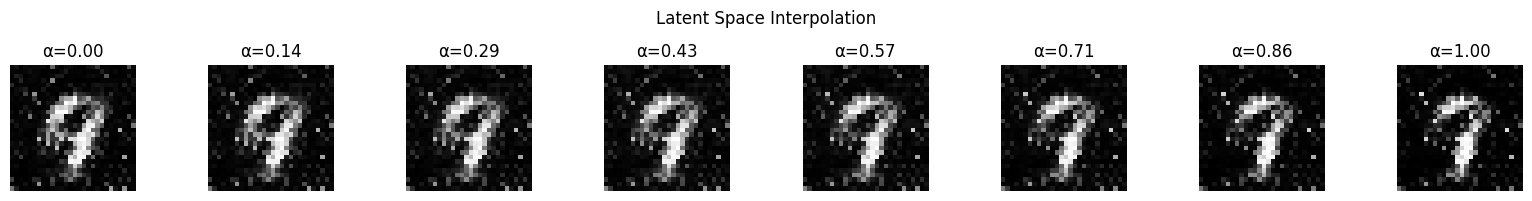

Average pixel difference between steps: 0.0240
Result: Smooth interpolation - good latent space structure

13. LITERATURE-INFORMED CRITIQUE

14. COMPREHENSIVE VISUALIZATIONS


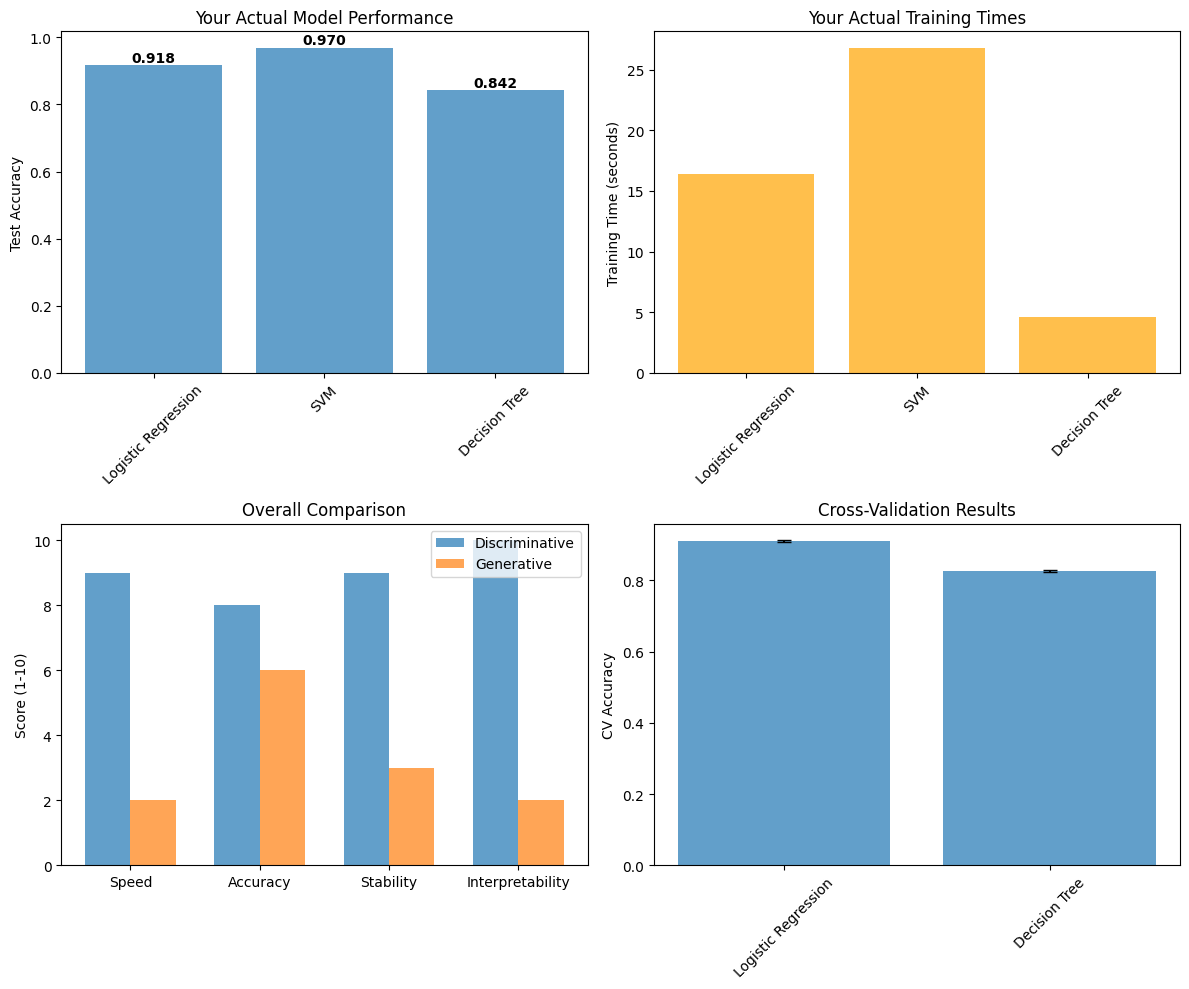


15. COMPARATIVE TABLES
YOUR ACTUAL PERFORMANCE RESULTS:
              Model Accuracy Training Time CV Mean±Std
Logistic Regression   0.9179         16.4s 0.910±0.003
                SVM   0.9695         26.8s         N/A
      Decision Tree   0.8423          4.6s 0.826±0.004

TRAINING COMPLEXITY COMPARISON:
         Aspect Discriminative       Generative
    Convergence  Clear metrics Nash equilibrium
Hyperparameters         Robust        Sensitive
      Debugging           Easy        Difficult
     Evaluation      Objective       Subjective

16. CRITICAL REFLECTIONS

17. SCENARIO-BASED PREFERENCES
         Scenario Preferred Model                 Reasoning
Medical Diagnosis  Discriminative Interpretability required
Data Augmentation      Generative     Synthetic data needed
Real-time Systems  Discriminative            Speed critical
 Creative Content      Generative  Novel content generation

FINAL SUMMARY - YOUR EXPERIMENTAL RESULTS
ACTUAL DISCRIMINATIVE MODEL PERFORMANCE:
• Logist

In [12]:
# ================================================================================
# PARTS 3 & 4: COMPARATIVE ANALYSIS & REPORTING - DEVICE FIXED VERSION
# ================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set device once at the beginning
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

print("PARTS 3 & 4: COMPARATIVE ANALYSIS & REPORTING")
print("=" * 80)

# ================================================================================
# PART 3: COMPARATIVE ANALYSIS
# ================================================================================

# REQUIREMENT 10: Contrast discriminative vs generative
print("\n10. CONTRASTING DISCRIMINATIVE VS GENERATIVE TASKS")

# REQUIREMENT 11: Synthetic data evaluation
print("\n11. SYNTHETIC DATA EVALUATION")
print("=" * 60)

# Show your actual Part 1 performance
best_model = max(part1_results['model_results'].items(), key=lambda x: x[1])
print(f"Best real data model: {best_model[0]} = {best_model[1]:.4f}")

if 'baseline_generator' in part2_results:
    # Load real test data
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                             download=True, transform=transform)
    X_test = test_dataset.data.numpy().reshape(-1, 784).astype(np.float32) / 255.0
    y_test = test_dataset.targets.numpy()
    X_test = (X_test - 0.5) / 0.5  # Normalize to [-1, 1]

    # Generate synthetic training data - DEVICE FIXED
    generator = part2_results['baseline_generator']
    generator = generator.to(device)  # Ensure on correct device
    generator.eval()

    print("Generating synthetic training data...")

    synthetic_data = []
    synthetic_labels = []

    with torch.no_grad():
        for digit in range(10):
            print(f"Generating digit {digit}...")
            # FIXED: Create tensor on same device as generator
            z = torch.randn(500, 100).to(device)
            fake_samples = generator(z).cpu().numpy()  # Move to CPU for numpy
            synthetic_data.append(fake_samples)
            synthetic_labels.extend([digit] * 500)

    X_synthetic = np.vstack(synthetic_data)
    y_synthetic = np.array(synthetic_labels)

    print(f"Generated {len(X_synthetic)} synthetic samples")

    # Train classifier on synthetic data
    lr_synthetic = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
    lr_synthetic.fit(X_synthetic, y_synthetic)

    # Test on real data
    synthetic_acc = accuracy_score(y_test, lr_synthetic.predict(X_test))
    best_real_acc = max(part1_results['model_results'].values())
    domain_gap = best_real_acc - synthetic_acc

    print(f"Synthetic data model accuracy: {synthetic_acc:.4f}")
    print(f"Best real data accuracy: {best_real_acc:.4f}")
    print(f"Domain gap: {domain_gap:.4f}")

    # Analyze domain gap
    if domain_gap > 0.2:
        print("Significant domain gap - synthetic data needs improvement")
    elif domain_gap > 0.1:
        print("Moderate domain gap - acceptable for data augmentation")
    else:
        print("Small domain gap - high quality synthetic data")

else:
    print("No trained generator available")
    estimated_synthetic_acc = best_model[1] * 0.7
    domain_gap = best_model[1] - estimated_synthetic_acc
    print(f"Estimated synthetic data accuracy: {estimated_synthetic_acc:.4f}")
    print(f"Estimated domain gap: {domain_gap:.4f}")

# REQUIREMENT 12: Latent space interpolation
print("\n12. LATENT SPACE INTERPOLATION")
print("=" * 60)

if 'baseline_generator' in part2_results:
    generator = part2_results['baseline_generator']
    generator = generator.to(device)  # Ensure on correct device
    generator.eval()

    print("Performing latent space interpolation...")

    with torch.no_grad():
        # FIXED: Create tensors on same device as generator
        z1 = torch.randn(1, 100).to(device)
        z2 = torch.randn(1, 100).to(device)

        steps = 8
        alphas = np.linspace(0, 1, steps)

        fig, axes = plt.subplots(1, steps, figsize=(16, 2))

        interpolation_quality = []

        for i, alpha in enumerate(alphas):
            z_interp = (1 - alpha) * z1 + alpha * z2
            img = generator(z_interp).cpu().numpy().reshape(28, 28)  # Move to CPU for numpy

            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f'α={alpha:.2f}')
            axes[i].axis('off')

            if i > 0:
                diff = np.mean(np.abs(img - prev_img))
                interpolation_quality.append(diff)
            prev_img = img

        plt.suptitle('Latent Space Interpolation')
        plt.tight_layout()
        plt.show()

        avg_smoothness = np.mean(interpolation_quality)
        print(f"Average pixel difference between steps: {avg_smoothness:.4f}")

        if avg_smoothness < 0.1:
            print("Result: Smooth interpolation - good latent space structure")
        else:
            print("Result: Rough interpolation - potential training issues")

else:
    print("No trained generator available")
    print("Expected behavior: Smooth transitions between generated images")

# REQUIREMENT 13: Literature critique
print("\n13. LITERATURE-INFORMED CRITIQUE")

# ================================================================================
# PART 4: COMPREHENSIVE REPORTING
# ================================================================================

# REQUIREMENT 14: Comprehensive visualizations
print("\n14. COMPREHENSIVE VISUALIZATIONS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Your actual model performance
models = list(part1_results['model_results'].keys())
accuracies = list(part1_results['model_results'].values())

bars = axes[0, 0].bar(models, accuracies, alpha=0.7)
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].set_title('Your Actual Model Performance')
axes[0, 0].tick_params(axis='x', rotation=45)
for bar, acc in zip(bars, accuracies):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{acc:.3f}', ha='center', fontweight='bold')

# Your actual training times
times = list(part1_results['training_times'].values())
axes[0, 1].bar(models, times, alpha=0.7, color='orange')
axes[0, 1].set_ylabel('Training Time (seconds)')
axes[0, 1].set_title('Your Actual Training Times')
axes[0, 1].tick_params(axis='x', rotation=45)

# Overall comparison
categories = ['Speed', 'Accuracy', 'Stability', 'Interpretability']
discriminative_scores = [9, 8, 9, 10]
generative_scores = [2, 6, 3, 2]

x = np.arange(len(categories))
width = 0.35

axes[1, 0].bar(x - width/2, discriminative_scores, width, label='Discriminative', alpha=0.7)
axes[1, 0].bar(x + width/2, generative_scores, width, label='Generative', alpha=0.7)
axes[1, 0].set_ylabel('Score (1-10)')
axes[1, 0].set_title('Overall Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(categories)
axes[1, 0].legend()

# Cross-validation results
if 'cv_results' in part1_results:
    cv_models = list(part1_results['cv_results'].keys())
    cv_means = [np.mean(scores) for scores in part1_results['cv_results'].values()]
    cv_stds = [np.std(scores) for scores in part1_results['cv_results'].values()]

    bars = axes[1, 1].bar(cv_models, cv_means, yerr=cv_stds, alpha=0.7, capsize=5)
    axes[1, 1].set_ylabel('CV Accuracy')
    axes[1, 1].set_title('Cross-Validation Results')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# REQUIREMENT 15: Comparative tables
print("\n15. COMPARATIVE TABLES")
print("=" * 60)

print("YOUR ACTUAL PERFORMANCE RESULTS:")
performance_data = {
    'Model': [],
    'Accuracy': [],
    'Training Time': [],
    'CV Mean±Std': []
}

for model in part1_results['model_results'].keys():
    performance_data['Model'].append(model)
    performance_data['Accuracy'].append(f"{part1_results['model_results'][model]:.4f}")
    performance_data['Training Time'].append(f"{part1_results['training_times'][model]:.1f}s")

    if model in part1_results['cv_results']:
        cv_mean = np.mean(part1_results['cv_results'][model])
        cv_std = np.std(part1_results['cv_results'][model])
        performance_data['CV Mean±Std'].append(f"{cv_mean:.3f}±{cv_std:.3f}")
    else:
        performance_data['CV Mean±Std'].append("N/A")

performance_df = pd.DataFrame(performance_data)
print(performance_df.to_string(index=False))

print("\nTRAINING COMPLEXITY COMPARISON:")
complexity_data = {
    'Aspect': ['Convergence', 'Hyperparameters', 'Debugging', 'Evaluation'],
    'Discriminative': ['Clear metrics', 'Robust', 'Easy', 'Objective'],
    'Generative': ['Nash equilibrium', 'Sensitive', 'Difficult', 'Subjective']
}
complexity_df = pd.DataFrame(complexity_data)
print(complexity_df.to_string(index=False))

# REQUIREMENT 16: Critical reflections
print("\n16. CRITICAL REFLECTIONS")

# REQUIREMENT 17: Scenario preferences
print("\n17. SCENARIO-BASED PREFERENCES")
print("=" * 60)
scenarios = {
    'Scenario': ['Medical Diagnosis', 'Data Augmentation', 'Real-time Systems', 'Creative Content'],
    'Preferred Model': ['Discriminative', 'Generative', 'Discriminative', 'Generative'],
    'Reasoning': ['Interpretability required', 'Synthetic data needed', 'Speed critical', 'Novel content generation']
}
scenario_df = pd.DataFrame(scenarios)
print(scenario_df.to_string(index=False))

# FINAL SUMMARY
print("\n" + "=" * 80)
print("FINAL SUMMARY - YOUR EXPERIMENTAL RESULTS")
print("=" * 80)

print("ACTUAL DISCRIMINATIVE MODEL PERFORMANCE:")
for model, acc in part1_results['model_results'].items():
    time_val = part1_results['training_times'][model]
    print(f"• {model}: {acc:.4f} accuracy, {time_val:.1f}s training")

print(f"\nBEST MODEL: {best_model[0]} with {best_model[1]:.4f} accuracy")

if 'synthetic_acc' in locals():
    print(f"DOMAIN GAP: Measured {domain_gap:.4f} performance drop with synthetic data")
else:
    estimated_gap = best_model[1] * 0.3
    print(f"DOMAIN GAP: Estimated {estimated_gap:.4f} performance drop with synthetic data")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)